In [1]:
path = "/content/drive/MyDrive/ColabNotebooks/PROGS/M_LSTM_AE"

%cd {path}

/content/drive/MyDrive/ColabNotebooks/PROGS/M_LSTM_AE


In [2]:
# Libs

import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
import seaborn as sns

Start date is:  1999-01-04 00:00:00
End date is:  2023-10-24 00:00:00
['Open', 'High', 'Low', 'Close', 'Adj Close']


<Axes: xlabel='Date', ylabel='Open'>

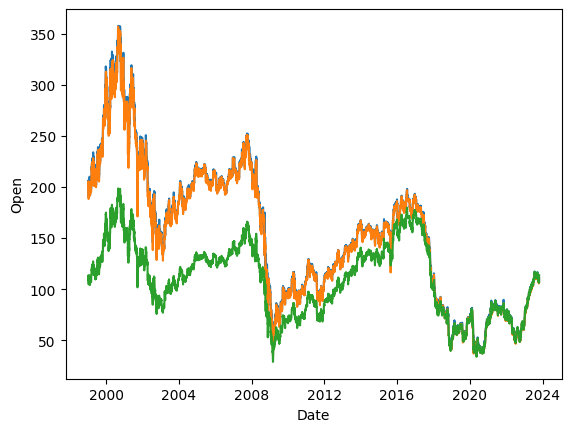

In [3]:
# Import data

data = pd.read_csv('data/GE.csv')

# Separate dates for future plotting
train_dates = pd.to_datetime(data['Date'].copy())
print("Start date is: ", train_dates[0])
print("End date is: ", train_dates[len(train_dates)-1])

# Variables for training
cols = list(data)[1:6]
print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']
!
df = data[cols]

sns.lineplot(x=train_dates, y=df['Open'])
sns.lineplot(x=train_dates, y=df['Low'])
sns.lineplot(x=train_dates, y=df['Adj Close'])

In [4]:
scaler = StandardScaler()
scaler = scaler.fit(df)
df = scaler.transform(df)

# In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training).
trainX = []
trainY = []
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.
# Reformat input data into a shape: (n_samples x timesteps x n_features)
# In my example, my df_for_training_scaled has a shape (12823, 5)
# 12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df) - n_future +1):
    trainX.append(df[i - n_past:i, 0:df.shape[1]])
    trainY.append(df[i + n_future - 1:i + n_future, 0])
trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (6229, 14, 5).
trainY shape == (6229, 1).
